In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
drive.mount('/content/drive',force_remount=True)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/CaKoi/Train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/CaKoi/Test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 4986 images belonging to 18 classes.
Found 932 images belonging to 18 classes.


In [ ]:
train.class_indices

{'Asagi': 0,
 'Bekko': 1,
 'Ghosiki': 2,
 'Ginrin': 3,
 'Goromo': 4,
 'Hajiro': 5,
 'Hariwake': 6,
 'Kanoko': 7,
 'Kawarimono': 8,
 'Kigoi': 9,
 'Kohaku': 10,
 'Platinum ogon': 11,
 'Sanke': 12,
 'Showa': 13,
 'Shusui': 14,
 'Tancho': 15,
 'Utsuri': 16,
 'Yamato': 17}

In [ ]:
def CNN_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    X = tfl.Conv2D(8, kernel_size=(4,4), strides=(1,1), padding='SAME')(input_img)
    X = tfl.ReLU()(X)
    X = tfl.MaxPool2D(pool_size=(8,8), strides=(8,8), padding='SAME')(X)
    X = tfl.Conv2D(16, kernel_size=(2,2), strides=(1,1), padding='SAME')(X)
    X = tfl.ReLU()(X)
    X = tfl.MaxPool2D(pool_size=(4,4), strides=(4,4), padding='SAME')(X)
    X = tfl.Flatten()(X)
    outputs = tfl.Dense(units=10, activation="softmax")(X)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
output = 18

model = Sequential()
model.add(Conv2D(64, (3,3), padding = 'same', kernel_initializer = 'he_uniform', input_shape = (256,256,3), 
                 activation = 'relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), padding = 'same',  kernel_initializer = 'he_uniform', activation = 'relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), padding='same',  kernel_initializer = 'he_uniform', activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu',  kernel_initializer = 'he_uniform'))

model.add(Dense(output, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)     

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

history = model.fit(train, epochs=20, validation_data=test, batch_size=128)

Epoch 1/20
156/156 [==============================] - 1147s 7s/step - loss: 3.1219 - accuracy: 0.2585 - val_loss: 1.7030 - val_accuracy: 0.4002
Epoch 2/20
156/156 [==============================] - 187s 1s/step - loss: 1.3670 - accuracy: 0.5624 - val_loss: 1.3166 - val_accuracy: 0.5687
Epoch 3/20
156/156 [==============================] - 187s 1s/step - loss: 0.8939 - accuracy: 0.7034 - val_loss: 1.0901 - val_accuracy: 0.6888
Epoch 4/20
156/156 [==============================] - 187s 1s/step - loss: 0.6629 - accuracy: 0.7906 - val_loss: 0.9384 - val_accuracy: 0.7210
Epoch 5/20
156/156 [==============================] - 185s 1s/step - loss: 0.4562 - accuracy: 0.8586 - val_loss: 0.9943 - val_accuracy: 0.7425
Epoch 6/20
156/156 [==============================] - 195s 1s/step - loss: 0.3376 - accuracy: 0.8883 - val_loss: 0.9268 - val_accuracy: 0.7543
Epoch 7/20
156/156 [==============================] - 198s 1s/step - loss: 0.2969 - accuracy: 0.9136 - val_loss: 1.0575 - val_accuracy: 0.759

In [ ]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  1.0040420293807983
Độ chính xác kiểm tra là:  0.8401287794113159


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


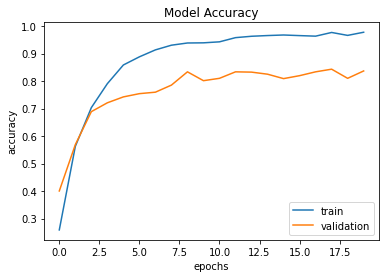

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [ ]:
# Lưu lại
model.save("Final_CaKoi.h5")

array([0])

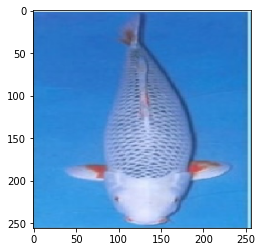

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
#tien doan du lieu
img = load_img("3.jpg",target_size = (256,256))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)
#'Asagi': 0,
#'Bekko': 1,
#'Ghosiki': 2,
#'Ginrin': 3,
#'Goromo': 4,
#'Hajiro': 5,
#'Hariwake': 6,
#'Kanoko': 7,
#'Kawarimono': 8,
#'Kigoi': 9,
#'Kohaku': 10,
#'Platinum ogon': 11,
#'Sanke': 12,
#'Showa': 13,
#'Shusui': 14,
#'Tancho': 15,
#'Utsuri': 16,
#'Yamato': 17


array([3])

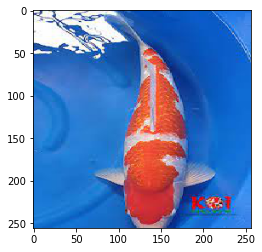

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
#tien doan du lieu
img = load_img("9.jpg",target_size = (256,256))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)
#'Asagi': 0,
#'Bekko': 1,
#'Ghosiki': 2,
#'Ginrin': 3,
#'Goromo': 4,
#'Hajiro': 5,
#'Hariwake': 6,
#'Kanoko': 7,
#'Kawarimono': 8,
#'Kigoi': 9,
#'Kohaku': 10,
#'Platinum ogon': 11,
#'Sanke': 12,
#'Showa': 13,
#'Shusui': 14,
#'Tancho': 15,
#'Utsuri': 16,
#'Yamato': 17


array([7])

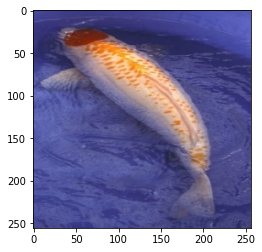

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
#tien doan du lieu
img = load_img("45.jpg",target_size = (256,256))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)
#'Asagi': 0,
#'Bekko': 1,
#'Ghosiki': 2,
#'Ginrin': 3,
#'Goromo': 4,
#'Hajiro': 5,
#'Hariwake': 6,
#'Kanoko': 7,
#'Kawarimono': 8,
#'Kigoi': 9,
#'Kohaku': 10,
#'Platinum ogon': 11,
#'Sanke': 12,
#'Showa': 13,
#'Shusui': 14,
#'Tancho': 15,
#'Utsuri': 16,
#'Yamato': 17
